## Keras -- MLPs on MNIST

In [0]:
# if you keras is not using tensorflow as backend set "KERAS_BACKEND=tensorflow" use this command
from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal

from keras.models import Sequential 
from keras.layers import Dense, Activation
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout



In [0]:
%matplotlib notebook
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()
    plt.show()

In [3]:
# the data, shuffled and split between train and test sets 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [4]:
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))

Number of training examples : 60000 and each image is of shape (28, 28)
Number of training examples : 10000 and each image is of shape (28, 28)


In [0]:
# if you observe the input shape its 2 dimensional vector
# for each image we have a (28*28) vector
# we will convert the (28*28) vector into single dimensional vector of 1 * 784 

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]) 

In [6]:
# after converting the input images from 3d to 2d vectors

print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d)"%(X_train.shape[1]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d)"%(X_test.shape[1]))

Number of training examples : 60000 and each image is of shape (784)
Number of training examples : 10000 and each image is of shape (784)


In [7]:
# An example data point
print(X_train[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [0]:
# if we observe the above matrix each cell is having a value between 0-255
# before we move to apply machine learning algorithms lets try to normalize the data
# X => (X - Xmin)/(Xmax-Xmin) = X/255

X_train = X_train/255
X_test = X_test/255

In [9]:
# here we are having a class number for each image
print("Class label of first image :", y_train[0])

# lets convert this into a 10 dimensional vector
# ex: consider an image is 5 convert it into 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# this conversion needed for MLPs 

Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)

print("After converting the output into a vector : ",Y_train[0])

Class label of first image : 5
After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [0]:
# some model parameters

output_dim = 10
input_dim = X_train.shape[1]

batch_size = 128 
nb_epoch = 20

In [17]:
model_relu = Sequential()
model_relu.add(Dense(512, activation='relu', input_shape=(input_dim,)))
model_relu.add(Dense(128, activation='relu'))
model_relu.add(Dense(output_dim, activation='softmax'))

model_relu.summary()

model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_5 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 121us/step - loss: 0.2420 - acc: 0.9298 - val_loss: 0.1165 - val_acc: 0.9668
Epoch 2/20
60000/60000 [==============================] - 7s 114us/step - loss: 0.0859 - acc: 0.9737 - val_loss: 0.0821 - val_acc: 0.9744
Epoch 3/20
60000/60000 [==============================] - 7s 114us/step - 

Test score: 0.09020908048287725
Test accuracy: 0.9836


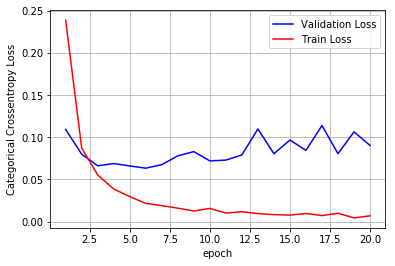

In [16]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

configure_plotly_browser_state()

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)


# Things keep in mind

https://stackoverflow.com/questions/47299624/how-to-understand-loss-acc-val-loss-val-acc-in-keras-model-fitting

Training should be stopped when val_acc stops increasing, otherwise your model will probably overffit. You can use earlystopping callback to stop training.

# Two Hidden Layers Architecture

In [35]:
# some model parameters

output_dim = 10
input_dim = X_train.shape[1]

batch_size = 100 
nb_epoch = 20

# 1st Hidden layer
two_layer_model_relu = Sequential()
two_layer_model_relu.add(Dense(400, activation='relu', input_shape=(input_dim,)))
two_layer_model_relu.add(BatchNormalization())
two_layer_model_relu.add(Dropout(0.5))

# 2nd Hidden layer
two_layer_model_relu.add(Dense(100, activation='relu'))
two_layer_model_relu.add(BatchNormalization())
two_layer_model_relu.add(Dropout(0.5))



two_layer_model_relu.add(Dense(output_dim, activation='softmax'))

two_layer_model_relu.summary()

two_layer_model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = two_layer_model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 400)               314000    
_________________________________________________________________
batch_normalization_9 (Batch (None, 400)               1600      
_________________________________________________________________
dropout_3 (Dropout)          (None, 400)               0         
_________________________________________________________________
dense_33 (Dense)             (None, 100)               40100     
_________________________________________________________________
batch_normalization_10 (Batc (None, 100)               400       
_________________________________________________________________
dropout_4 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_34 (Dense)             (None, 10)                1010      
Total para

Test score: 0.054605189490824706
Test accuracy: 0.9833


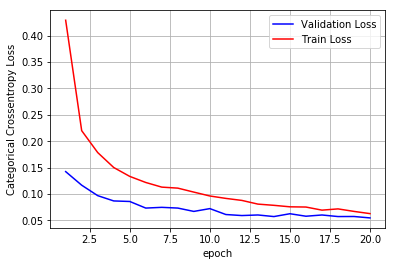

In [36]:
score = two_layer_model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

# Three Hidden Layers Architecture

In [39]:
# some model parameters

output_dim = 10
input_dim = X_train.shape[1]

batch_size = 100 
nb_epoch = 20

# 1st Hidden layer
three_layer_model_relu = Sequential()
three_layer_model_relu.add(Dense(400, activation='relu', input_shape=(input_dim,)))
three_layer_model_relu.add(BatchNormalization())
three_layer_model_relu.add(Dropout(0.5))

# 2nd Hidden layer
three_layer_model_relu.add(Dense(200, activation='relu'))
three_layer_model_relu.add(BatchNormalization())
three_layer_model_relu.add(Dropout(0.5))

# 3rd Hidden layer
three_layer_model_relu.add(Dense(100, activation='relu'))
three_layer_model_relu.add(BatchNormalization())
three_layer_model_relu.add(Dropout(0.5))


three_layer_model_relu.add(Dense(output_dim, activation='softmax'))

three_layer_model_relu.summary()

three_layer_model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = three_layer_model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40 (Dense)             (None, 400)               314000    
_________________________________________________________________
batch_normalization_14 (Batc (None, 400)               1600      
_________________________________________________________________
dropout_8 (Dropout)          (None, 400)               0         
_________________________________________________________________
dense_41 (Dense)             (None, 200)               80200     
_________________________________________________________________
batch_normalization_15 (Batc (None, 200)               800       
_________________________________________________________________
dropout_9 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_42 (Dense)             (None, 100)               20100     
__________

Test score: 0.06033014571936801
Test accuracy: 0.9829


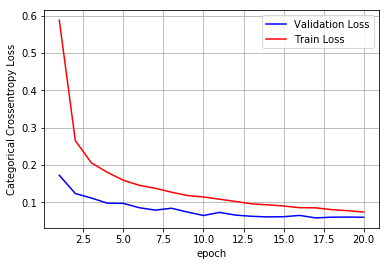

In [40]:
score = three_layer_model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

# Five Hidden Layers Architecture

In [43]:
# some model parameters

output_dim = 10
input_dim = X_train.shape[1]

batch_size = 100 
nb_epoch = 20

# 1st Hidden layer
five_layer_model_relu = Sequential()
five_layer_model_relu.add(Dense(500, activation='relu', input_shape=(input_dim,)))
five_layer_model_relu.add(BatchNormalization())
five_layer_model_relu.add(Dropout(0.5))

# 2nd Hidden layer
five_layer_model_relu.add(Dense(350, activation='relu'))
five_layer_model_relu.add(BatchNormalization())
five_layer_model_relu.add(Dropout(0.5))

# 3rd Hidden layer
five_layer_model_relu.add(Dense(200, activation='relu'))
five_layer_model_relu.add(BatchNormalization())
five_layer_model_relu.add(Dropout(0.5))

# 4th Hidden layer
five_layer_model_relu.add(Dense(100, activation='relu'))
five_layer_model_relu.add(BatchNormalization())
five_layer_model_relu.add(Dropout(0.5))

# 5th Hidden layer
five_layer_model_relu.add(Dense(50, activation='relu'))
five_layer_model_relu.add(BatchNormalization())
five_layer_model_relu.add(Dropout(0.5))


five_layer_model_relu.add(Dense(output_dim, activation='softmax'))

five_layer_model_relu.summary()

five_layer_model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = five_layer_model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_50 (Dense)             (None, 500)               392500    
_________________________________________________________________
batch_normalization_22 (Batc (None, 500)               2000      
_________________________________________________________________
dropout_16 (Dropout)         (None, 500)               0         
_________________________________________________________________
dense_51 (Dense)             (None, 350)               175350    
_________________________________________________________________
batch_normalization_23 (Batc (None, 350)               1400      
_________________________________________________________________
dropout_17 (Dropout)         (None, 350)               0         
_________________________________________________________________
dense_52 (Dense)             (None, 200)               70200     
__________

Test score: 0.07435557465390302
Test accuracy: 0.9829


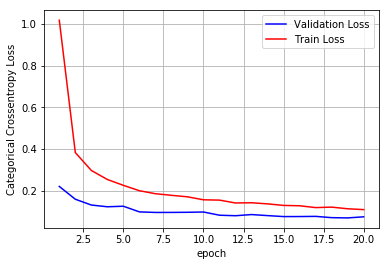

In [44]:
score = five_layer_model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

# Conclusion

In [21]:
import pandas as pd
from prettytable import PrettyTable

bold = '\033[1m'
end = '\033[0m'


print(bold+'\t\t\t\t Keras  '+end)
print('\n')


print('In Two hidden layers we have used,  neuron architecture is '+bold+str(400)+','+str(100)+end)
print('In Three hidden layers we have used,neuron architecture is '+bold+str(400)+','+str(200)+','+str(100)+end)
print('In Five hidden layers we have used, neuron architecture is '+bold+str(500)+','+str(350)+','+str(200)+','+str(100)+','+str(50)+end)


x = PrettyTable()
x.field_names =  ['Metric','Two Hidden Layer','Three Hidden Layer', 'Five Hidden Layer']

x.add_row(["Train Accuracy ", 0.9799,0.9773,0.9729])
x.add_row(["Train Loss ", 0.0627,0.0743,0.1089])


x.add_row(["Validation Accuracy ",0.9833,0.9829,0.9829])
x.add_row(["Validation Loss ", 0.0546,0.0603,0.0744])

x.add_row(["Test Accuracy ",0.9833,0.9829,0.9829])
x.add_row(["Test Loss ", 0.054605,0.06033,0.074355])


print('\n')
print(x)

				 Keras  


In Two hidden layers we have used,  neuron architecture is 400,100
In Three hidden layers we have used,neuron architecture is 400,200,100
In Five hidden layers we have used, neuron architecture is 500,350,200,100,50


+----------------------+------------------+--------------------+-------------------+
|        Metric        | Two Hidden Layer | Three Hidden Layer | Five Hidden Layer |
+----------------------+------------------+--------------------+-------------------+
|   Train Accuracy     |      0.9799      |       0.9773       |       0.9729      |
|     Train Loss       |      0.0627      |       0.0743       |       0.1089      |
| Validation Accuracy  |      0.9833      |       0.9829       |       0.9829      |
|   Validation Loss    |      0.0546      |       0.0603       |       0.0744      |
|    Test Accuracy     |      0.9833      |       0.9829       |       0.9829      |
|      Test Loss       |     0.054605     |      0.06033       |      0.074355     |
+-